# Prevendo o preço do aluguel do Rio de Janeiro

- A empresa HashMoveis contratou você para ajudar a decidir em quais imóveis investir. Para isso, precisamos **prever qual seria o alguel desse imóvel pelo airbnb** e investir nos imóveis que vão **trazer um retorno mais rápido do investimento**.


As principais etapas de um projeto de Ciência de Dados são:
1. Definição do problema
2. Entendimento e tratamento dos dados
3. Análise Exploratória
4. Tratamento dos Dados
5. Definição do modelo
6. modelo de produção

### 1. Definição do problema
Para entender o problema, algumas perguntas são fundamentais:
- De forma direta: **"Qual problema eu quero resolver?"**
- Quais são minhas métricas de sucesso?
- Qual o prazo desejado para esse projeto?
- Quem são os interessados nesse resultado?
- Quais são os **dados** disponíveis?

### 2. Entendimento e tratamento dos dados
- Utilizamos o **pandas** para noa ajudar em todas as etapas de entedimento dos dados
- A base de dados que utilizaremos: https://www.kaggle.com/datasets/dantebarros/transformed-data-from-quinto-andars-platform

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
dado = pd.read_csv('quinto_andar_data.csv')
dado

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,https://www.quintoandar.com.br/imovel/89282425...,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
2771,https://www.quintoandar.com.br/imovel/89336040...,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2772,https://www.quintoandar.com.br/imovel/89292613...,Belém,1350.0,281.0,0.0,18.0,27.0,1676.0,32.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0
2773,https://www.quintoandar.com.br/imovel/89336592...,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0


In [3]:
# Qual o tipo de dado?
print(type(dado))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# Informações sobre o nosso dataframe
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


In [5]:
# Visualizar as primeiras linhas
dado.head(5)

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0


In [6]:
# Visualizar as ultimas linhas
dado.tail(5)

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
2770,https://www.quintoandar.com.br/imovel/89282425...,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
2771,https://www.quintoandar.com.br/imovel/89336040...,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2772,https://www.quintoandar.com.br/imovel/89292613...,Belém,1350.0,281.0,0.0,18.0,27.0,1676.0,32.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0
2773,https://www.quintoandar.com.br/imovel/89336592...,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2774,https://www.quintoandar.com.br/imovel/89294786...,Jardim Paulista,4182.0,887.0,302.0,53.0,83.0,5507.0,130.0,2.0,1.0,0.0,5.0,1.0,0.0,1.0


In [7]:
# Verificando valores nulos
dado.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [8]:
# Filtrando os dados
dado[dado.bairro == 'Liberdade']

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
21,https://www.quintoandar.com.br/imovel/89336421...,Liberdade,600.0,334.0,0.0,8.0,12.0,954.0,60.0,1.0,1.0,0.0,10.0,1.0,0.0,1.0
43,https://www.quintoandar.com.br/imovel/89336704...,Liberdade,1200.0,356.0,60.0,16.0,24.0,1656.0,50.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0
65,https://www.quintoandar.com.br/imovel/89299049...,Liberdade,600.0,378.0,24.0,8.0,12.0,1022.0,33.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,https://www.quintoandar.com.br/imovel/89325487...,Liberdade,1080.0,180.0,21.0,14.0,21.0,1316.0,25.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2716,https://www.quintoandar.com.br/imovel/89292341...,Liberdade,1200.0,310.0,0.0,16.0,24.0,1550.0,40.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2745,https://www.quintoandar.com.br/imovel/89333914...,Liberdade,2500.0,335.0,167.0,32.0,50.0,3084.0,90.0,3.0,3.0,0.0,7.0,1.0,0.0,0.0
2756,https://www.quintoandar.com.br/imovel/89337772...,Liberdade,911.0,376.0,51.0,12.0,18.0,1368.0,40.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0


In [9]:
dado[dado.condominio.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
987,https://www.quintoandar.com.br/imovel/89288689...,Bela Vista,2960.0,NaN,125.0,49.0,59.0,3193.0,100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
1391,https://www.quintoandar.com.br/imovel/89310205...,Perdizes,5200.0,NaN,1030.0,86.0,104.0,6420.0,220.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0
1527,https://www.quintoandar.com.br/imovel/89310896...,Aclimação,3000.0,NaN,158.0,50.0,60.0,3268.0,90.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0
1801,https://www.quintoandar.com.br/imovel/89284189...,Ipiranga,2600.0,NaN,100.0,43.0,52.0,2795.0,100.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
2287,https://www.quintoandar.com.br/imovel/89288795...,Ipiranga,1000.0,NaN,80.0,17.0,20.0,1117.0,25.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0
2387,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2751,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


Os anúncios que não tem o valor de condominio, quer dizer que são casas com um unico dono e não pagam condominio.
- Podemos substituir o valor nulo para 0

In [10]:
dado.url[1391]


'https://www.quintoandar.com.br/imovel/893102051?search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A2147%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

In [11]:
# Substituindo os valores nulos por zero
dado.loc[dado.condominio.isnull(), 'condominio'] = 0

Agora vamos tratar os valores nulos de iptu
- A maioria dos anuncios com o iptu nulo, estão indisponíveis
- Ao invés de colocar o valor 0 como o anterior, podemos simplesmente remover

In [12]:
# Removendo os valores nulos
# dropna remover valores nulos (axis = 0) -> linhas;  (axis = 1) -> colunas

dado = dado.dropna(axis = 0)

In [13]:
dado.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         0
iptu               0
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [14]:
dado.shape

(2767, 16)

In [15]:
# Trabalhando com as colunas
dado['url']

0       https://www.quintoandar.com.br/imovel/89332996...
1       https://www.quintoandar.com.br/imovel/89334069...
2       https://www.quintoandar.com.br/imovel/89333859...
3       https://www.quintoandar.com.br/imovel/89337065...
4       https://www.quintoandar.com.br/imovel/89337700...
                              ...                        
2770    https://www.quintoandar.com.br/imovel/89282425...
2771    https://www.quintoandar.com.br/imovel/89336040...
2772    https://www.quintoandar.com.br/imovel/89292613...
2773    https://www.quintoandar.com.br/imovel/89336592...
2774    https://www.quintoandar.com.br/imovel/89294786...
Name: url, Length: 2767, dtype: object

In [16]:
# Como eliminar uma coluna
dado = dado.drop('url', axis=1)
dado

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
2771,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2772,Belém,1350.0,281.0,0.0,18.0,27.0,1676.0,32.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0
2773,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0


### 3. Análise exploratória de dados
- Nessa etapa vamos explorar a nossa base

In [17]:
dado.head(3)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0


In [18]:
# Ver um resumo estatístico da base de dados
dado.describe()

# Mean: media
# std: desvio padrão
# min: valor minimo
# max: valor máximo

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,2276.430430,596.070473,283.561980,29.923021,45.325985,3232.463679,63.759668,1.593784,1.398265,0.627033,5.924828,0.775208,0.202024,0.733647
std,1327.758115,430.433379,9424.657082,17.660109,26.584522,9600.842536,38.680371,0.748924,0.686907,0.674153,5.000881,0.417521,0.401582,0.442131
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.000000,28.000000,1876.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,1950.000000,520.000000,55.000000,26.000000,39.000000,2615.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2735.000000,800.000000,140.000000,36.000000,54.000000,3751.000000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


In [19]:
# O que seria a mediana da nossa base
dado.aluguel.median()

1950.0

In [20]:
# Ver os quartils
dado.aluguel.quantile(0.25)

1400.0

<Axes: >

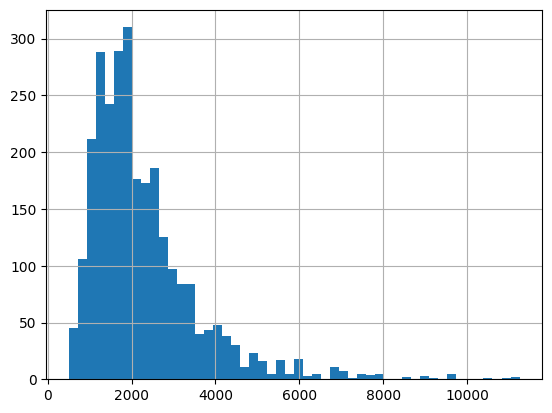

In [21]:
# Plotando histograma
dado.aluguel.hist(bins=50)

Melhorando o histograma

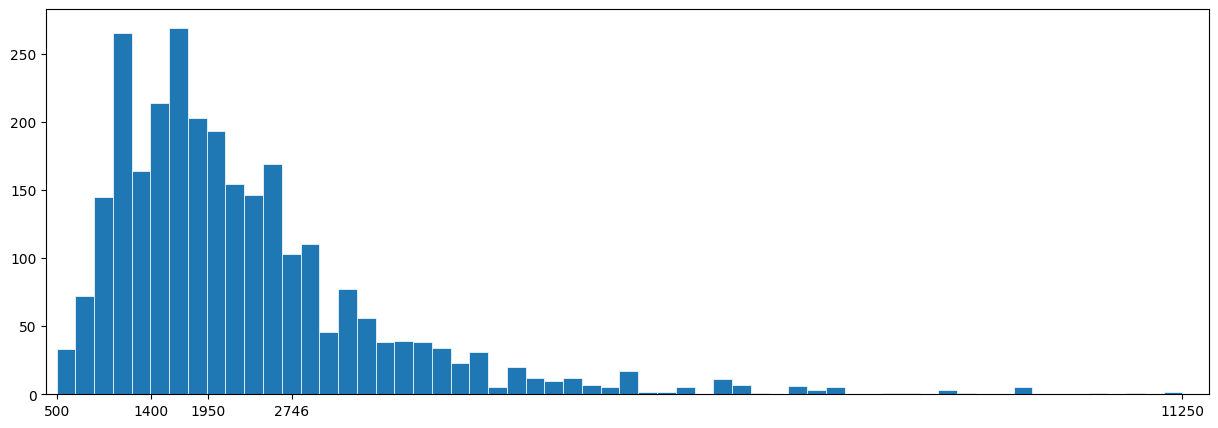

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(dado.aluguel, bins=60, linewidth=0.5, edgecolor='white')

ax.set(xlim=(400, 11500), xticks=[500, 1400, 1950, 2746.5, 11250])

plt.show()

<Axes: >

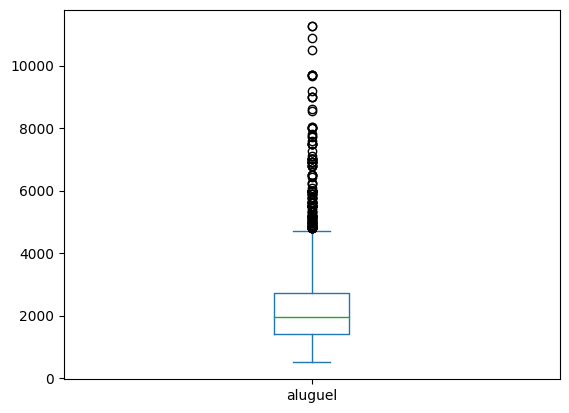

In [23]:
# Outra forma de visualizar essa informação é utilizando o boxplot
dado.aluguel.plot.box()

Existe uma pequena quantidade de aluguéis caros, o que faz esses imóveis serem tão caros?

In [24]:
dado.sort_values('aluguel', ascending=False).head(10)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
235,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
1402,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
255,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0


Como verificar se uma base de dados tem valores duplicados?

In [25]:
# Não podemos ter valores duplicados
dado[dado.duplicated()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
77,Barra Funda,1060.0,287.0,0.0,14.0,21.0,1382.0,50.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
176,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
250,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
267,Paraíso,3400.0,1372.0,360.0,44.0,68.0,5244.0,147.0,3.0,3.0,1.0,4.0,1.0,0.0,1.0
306,Perdizes,2150.0,0.0,0.0,28.0,43.0,2221.0,72.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,Vila Nova Conceição,3090.0,900.0,184.0,40.0,61.0,4275.0,85.0,2.0,2.0,1.0,12.0,1.0,0.0,0.0
2770,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
2771,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2773,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0


In [26]:
# Removendo esses valores
dado = dado.drop_duplicates(keep='last')

In [27]:
# Verificando novamente
dado[dado.duplicated()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox


**Conferindo as correlações entre as colunas**

<Axes: xlabel='metragem', ylabel='aluguel'>

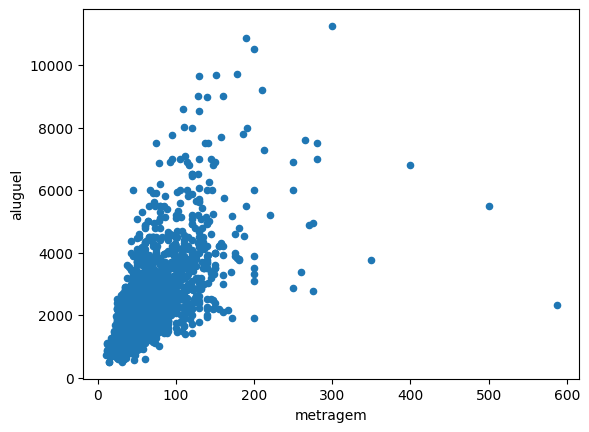

In [28]:
# Será que existe relação entre aluguel e metragem?
dado.plot.scatter(x='metragem', y='aluguel') # Existe correlação

<Axes: xlabel='quarto', ylabel='aluguel'>

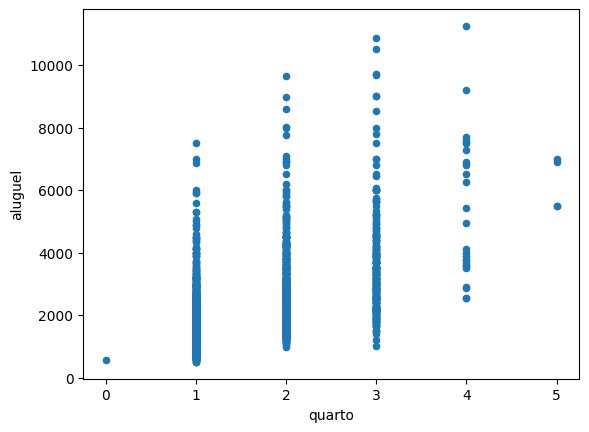

In [29]:
# Existe correlação entre aluguel e quartos?
dado.plot.scatter(x='quarto', y='aluguel') # Não existe correlação

<Axes: xlabel='aluguel', ylabel='bairro'>

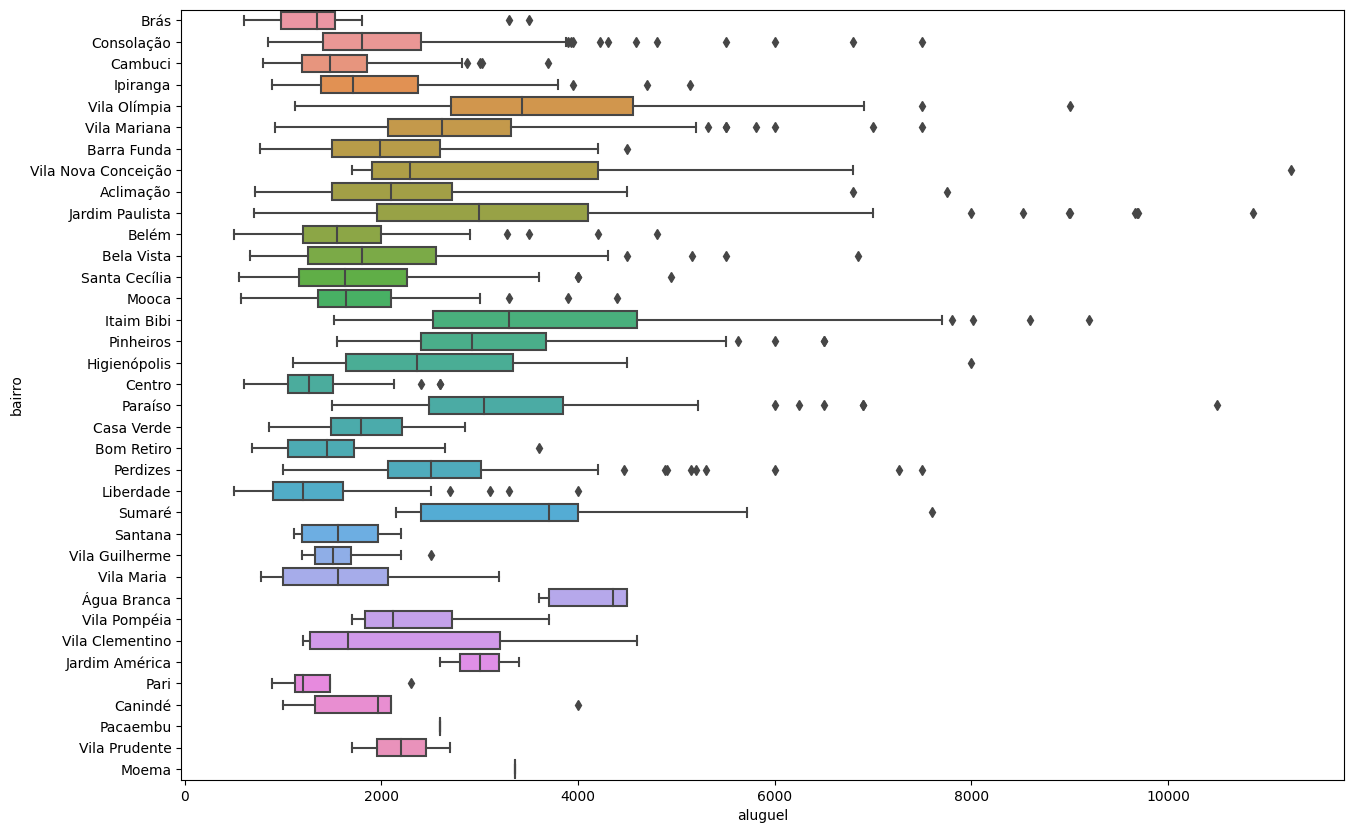

In [30]:
# Correlação entre aluguel e bairro

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x='aluguel', y='bairro', data=dado, orient='h')

In [31]:
# Verificando a quantidade de registros em cada bairro
dado.bairro.value_counts()

bairro
Consolação             271
Jardim Paulista        190
Bela Vista             187
Santa Cecília          178
Pinheiros              117
Vila Mariana           114
Mooca                   99
Itaim Bibi              87
Cambuci                 86
Liberdade               86
Perdizes                84
Centro                  80
Aclimação               75
Paraíso                 59
Ipiranga                55
Barra Funda             53
Bom Retiro              51
Belém                   35
Brás                    29
Vila Olímpia            29
Higienópolis            28
Casa Verde              24
Vila Guilherme          18
Vila Nova Conceição     14
Vila Pompéia            14
Vila Clementino         10
Sumaré                   9
Santana                  8
Canindé                  6
Vila Maria               6
Água Branca              5
Pari                     4
Jardim América           2
Vila Prudente            2
Pacaembu                 1
Moema                    1
Name: count, dtype: i

Algo que pode ser feito é incluirmos novas informações na base de dados

In [32]:
# Importando uma base de bairros x regiões
regioes = pd.read_excel('bairros.xlsx')
regioes

,Bairro,Região
0,Sé,Centro
1,Bela Vista,Centro
2,Bom Retiro,Centro
3,Cambuci,Centro
4,Consolação,Centro
...,...,...
108,Vila Clementino,Sul
109,Canindé,Centro
110,Água Branca,Oeste
111,Jardim América,Oeste


In [33]:
# Unindo essas duas bases
dado = pd.merge(
    dado,
    regioes,
    how ='left',
    left_on='bairro', right_on='Bairro'
)
dado

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Brás,600.0,450.0,14.0,8.0,12.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste
1,Consolação,1790.0,598.0,10.0,23.0,35.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro
2,Cambuci,1550.0,1.0,28.0,26.0,31.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro
3,Ipiranga,1600.0,0.0,142.0,27.0,32.0,1801.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,Ipiranga,Sul
4,Vila Olímpia,1700.0,1106.0,218.0,22.0,34.0,3080.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,Vila Olímpia,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,Aclimação,Centro
2230,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,Santa Cecília,Centro
2231,Belém,1350.0,281.0,0.0,18.0,27.0,1676.0,32.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0,Belém,Leste
2232,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,Aclimação,Centro


Corrigindo a nova base de dados

In [34]:
# Substituindo a região por norte
dado.loc[dado.Região.isnull(), 'Região'] = 'Norte'

In [35]:
# Corrigindo o nome de Vila Maria
dado.loc[dado.bairro == 'Vila Maria ', 'bairro'] = 'Vila Maria'
dado[dado.Região.isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região


In [36]:
# Plotando novamente, correlação entre aluguel e região

<Axes: xlabel='aluguel', ylabel='Região'>

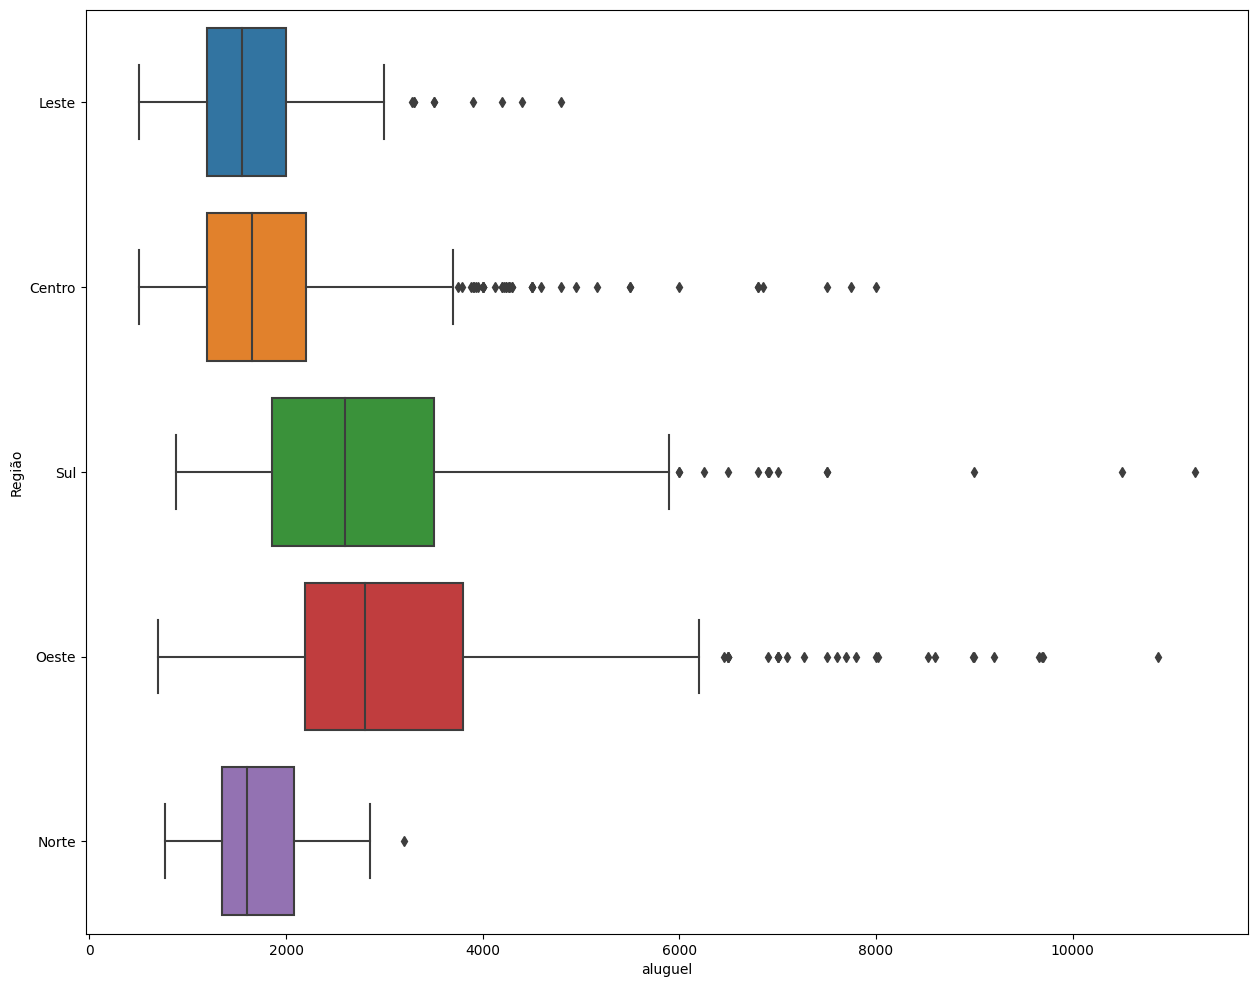

In [37]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x='aluguel', y='Região', data=dado, orient='h')

/home/leandro/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leandro/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leandro/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leandro/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

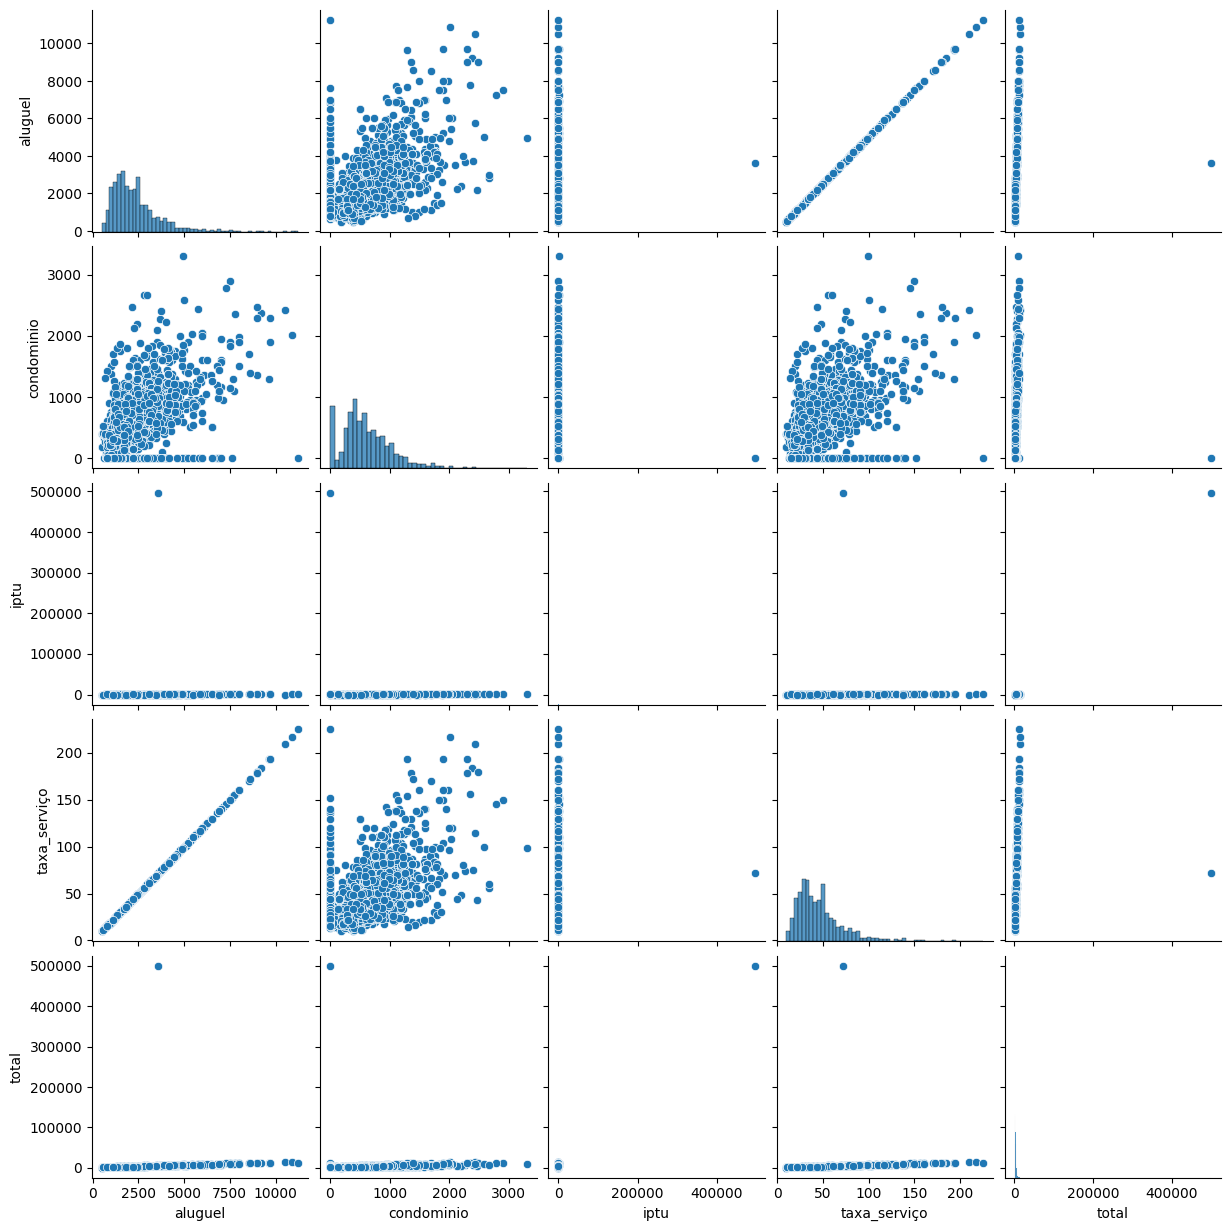

In [38]:
dadoAux = dado[['aluguel', 'condominio', 'iptu', 'taxa_serviço', 'total']]
sns.pairplot(dadoAux)

In [39]:
dado[dado.total == dado.total.max()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
1188,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,Santa Cecília,Centro


In [40]:
dado.loc[dado.total == dado.total.max(), 'iptu'] = 459.8
dado.loc[dado.total == dado.total.max(), 'total'] = 4227.8

### 4.Tratamento de dados

In [41]:
# Verificando a taxa do serviço
dado['taxa_ser'] = round((dado.taxa_serviço/dado.aluguel)*100,2)
dado['taxa_inc'] = round((dado.seguro_incendio/dado.aluguel)*100,2)

dado

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região,taxa_ser,taxa_inc
0,Brás,600.0,450.0,14.0,8.0,12.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste,2.00,1.33
1,Consolação,1790.0,598.0,10.0,23.0,35.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro,1.96,1.28
2,Cambuci,1550.0,1.0,28.0,26.0,31.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro,2.00,1.68
3,Ipiranga,1600.0,0.0,142.0,27.0,32.0,1801.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,Ipiranga,Sul,2.00,1.69
4,Vila Olímpia,1700.0,1106.0,218.0,22.0,34.0,3080.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,Vila Olímpia,Sul,2.00,1.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,Aclimação,Centro,2.00,1.68
2230,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,Santa Cecília,Centro,1.96,1.34
2231,Belém,1350.0,281.0,0.0,18.0,27.0,1676.0,32.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0,Belém,Leste,2.00,1.33
2232,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,Aclimação,Centro,2.00,1.27


In [42]:
# Removendo colunas desnecessárias
dado = dado.drop(['taxa_serviço', 'taxa_ser', 'seguro_incendio', 'taxa_inc', 'total'], axis=1)
dado

,bairro,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Brás,600.0,450.0,14.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste
1,Consolação,1790.0,598.0,10.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro
2,Cambuci,1550.0,1.0,28.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro
3,Ipiranga,1600.0,0.0,142.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,Ipiranga,Sul
4,Vila Olímpia,1700.0,1106.0,218.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,Vila Olímpia,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,Aclimação,2200.0,0.0,72.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,Aclimação,Centro
2230,Santa Cecília,1120.0,280.0,0.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,Santa Cecília,Centro
2231,Belém,1350.0,281.0,0.0,32.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0,Belém,Leste
2232,Aclimação,1100.0,308.0,16.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,Aclimação,Centro


Alguns modelos não conseguem trabalhar com texto, então também precisamos transformar colunas que estiverem como texto em numerico

In [43]:
dado = dado.drop(['bairro', 'Bairro'], axis=1)
dado

,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Região
0,600.0,450.0,14.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Leste
1,1790.0,598.0,10.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Centro
2,1550.0,1.0,28.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Centro
3,1600.0,0.0,142.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,Sul
4,1700.0,1106.0,218.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...
2229,2200.0,0.0,72.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,Centro
2230,1120.0,280.0,0.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,Centro
2231,1350.0,281.0,0.0,32.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0,Leste
2232,1100.0,308.0,16.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,Centro


In [44]:
# Transformando texto em numerico
pd.get_dummies(dado.Região)

,Centro,Leste,Norte,Oeste,Sul
0,False,True,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
2229,True,False,False,False,False
2230,True,False,False,False,False
2231,False,True,False,False,False
2232,True,False,False,False,False


In [45]:
dado = pd.concat([dado, pd.get_dummies(dado.Região)], axis=1)
dado = dado.drop('Região', axis=1)
dado

,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Centro,Leste,Norte,Oeste,Sul
0,600.0,450.0,14.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,False,True,False,False,False
1,1790.0,598.0,10.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,True,False,False,False,False
2,1550.0,1.0,28.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,True,False,False,False,False
3,1600.0,0.0,142.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,False,False,False,False,True
4,1700.0,1106.0,218.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,2200.0,0.0,72.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,True,False,False,False,False
2230,1120.0,280.0,0.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,True,False,False,False,False
2231,1350.0,281.0,0.0,32.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0,False,True,False,False,False
2232,1100.0,308.0,16.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,True,False,False,False,False


### 5.Definição do modelo
Antes de tudo, precisamos pensar em qual problema queremos resolver, se temos exemplos, com resultados (rótulos/labels), do que queremos prever, estamos falando de **aprendizado supervisionado**.
- **Regressão:** Prever um valor numérico contínio
    - Exemplo: prever o valor de uma casa, do aluguel, a quantidade de vendas...
- **Classificação:** Preber uma classe
    - Exemplo: Prever se a fruta é banana ou maçã, se uma transação é fraude, se a pessoa possui ou não a doença....

Se não temos os valores dos resultados e queremos apenas descobrir estruturas e padrões semelhantes, temos um problema de **aprendizado não supervisionado**.

**Antes de definir o modelo, o primeiro passo é separar os nossos dados em treino e teste**

- Essa etapa é extremamente importante pois vamos precisar **Avaliar a qualidade do nosso modelo** e só conseguimos fazer isso utilizando os dados de teste!

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [47]:
# x é o que eu quero utilizar para fazer a previsão(Atributos)
# Y o que vc quer prever, objetivo, (Target)
X = dado.drop('aluguel', axis=1)
y = dado.aluguel

In [48]:
# 70% para treino, 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Depois de separar nossa base em treino e teste, podemos usar a base de treino para criar o nosso modelo usando diferentes algoritmos**

In [49]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.6538967305345713

**Para cada moodelo que criarmos, devemos analisar o erro desse modelo. Faremos isso utilizando os dados de teste**

In [50]:
# Fazendo a previsão com o modelo anterior
y_pred = model.predict(X_test)

# Avaliando o erro
mean_absolute_error(y_test, y_pred)

538.19371592018

**Quanto menor o erro, melhor!!**

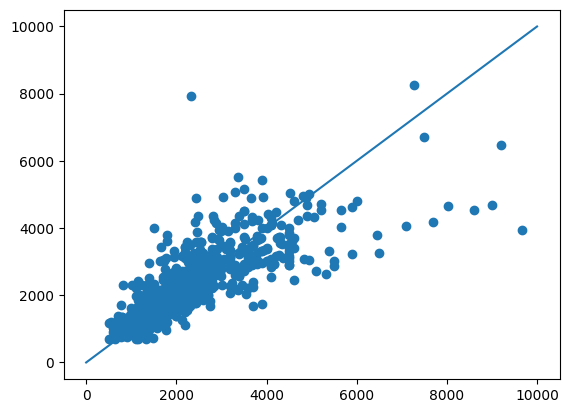

In [51]:
# Visualizando essa diferença graficamente
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, 10000], [0, 10000])
plt.show()

**Vamos compaarar com outro modelo de aprendizado de máquina**

In [52]:
# Arvore de decisão
from sklearn import tree    

In [71]:
model2 = tree.DecisionTreeRegressor(random_state=42)
model2 = model2.fit(X_train, y_train)
model2.score(X_train, y_train)

0.9999982457122238

In [72]:
y_predArvore = model2.predict(X_test)

In [73]:
mean_absolute_error(y_test, y_predArvore)

686.1626016260162

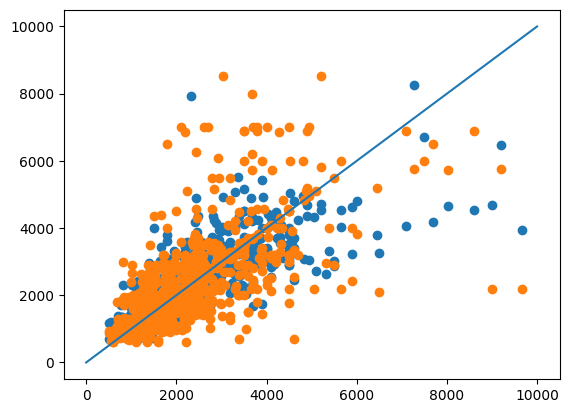

In [74]:
# Visualizando essa diferença graficamente
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.scatter(y_test, y_predArvore)
ax.plot([0, 10000], [0, 10000])
plt.show()

**Avaliar erros como o erro medio quadrático médio**

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
# Regressão linear
mean_squared_error(y_test, y_pred)

656466.8481802181

In [77]:
# Arvore de treinamento
mean_squared_error(y_test, y_predArvore)

1241178.9217103282

In [78]:
colunas = dado.drop('aluguel', axis=1).columns
print(colunas)

Index(['condominio', 'iptu', 'metragem', 'quarto', 'banheiro', 'vaga_carro',
       'andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Centro', 'Leste',
       'Norte', 'Oeste', 'Sul'],
      dtype='object')


In [79]:
# podemos percorrer toda a lista acima eliminando cada uma das colunas
nomes = ['todas']
regressao = [mean_absolute_error(y_test, y_pred)]
arvore = [mean_absolute_error(y_test, y_predArvore)]

for i in colunas:
    nomes.append(i)
    dado_novo = dado.drop(i, axis=1)
    
    # Definindo X e y
    X_novo = dado_novo.drop('aluguel', axis=1)
    y_novo = dado_novo.aluguel
    
    # Separando em treino e teste
    X_train_novo, X_test_novo, y_train_novo, y_test_novo = train_test_split(X_novo, y_novo, test_size=0.33, random_state=42)
    
    # Regressão Linear
    model = LinearRegression().fit(X_train_novo, y_train_novo)
    y_pred_novo = model.predict(X_test_novo)
    regressao.append(mean_absolute_error(y_test_novo, y_pred_novo))
    
    # Arvore de regressão
    model2 = model2.fit(X_train_novo, y_train_novo)
    y_predArvore_novo = model2.predict(X_test_novo)
    arvore.append(mean_absolute_error(y_test_novo, y_predArvore_novo))

# Guardando o resultado em um DataFrame
resultado = pd.DataFrame([regressao, arvore])
resultado.columns = nomes

In [80]:
resultado

,todas,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Centro,Leste,Norte,Oeste,Sul
0,538.193716,536.828665,542.782620,553.599500,539.594430,552.283506,547.381042,541.403363,539.123247,551.772943,538.364476,538.193716,538.193716,538.193716,538.193716,538.193716
1,686.162602,654.239837,655.619241,706.326558,666.265583,645.136856,667.735772,693.519422,676.979223,702.906278,678.077236,678.987805,670.221771,675.439024,679.416893,664.689702


**Temos que utilizar diversos modelos até encontrar o melhor**

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
model_forest = RandomForestRegressor(max_depth=8, random_state=0)
model_forest.fit(X_train, y_train)
y_predRF = model_forest.predict(X_test)

In [91]:
# Analisando o erro
mean_absolute_error(y_test, y_predRF)

502.93100330249223

Chegamos no melhor

### 5.1 Hiperparâmetros

In [83]:
regArvore = tree.DecisionTreeRegressor(random_state=42, criterion='poisson', max_depth=6)
regArvore = regArvore.fit(X_train, y_train)
y_predArvore = regArvore.predict(X_test)

In [84]:
mean_absolute_error(y_test, y_predArvore)

588.5930897445047

### 6.Modelo em produção
Nessa etapa, vamos fazer o que chamamos de persistir o modelo, ou seja, fazer ele funcionar além do nosso código.

In [96]:
from joblib import dump, load

In [97]:
# Fazendo o dump do modelo que queremos utilizar
dump(model_forest, 'regressor.joblib')

['regressor.joblib']

In [98]:
# So para lembrarmos, quais colunas precisamos para o nosso modelo?
X_test.columns

Index(['condominio', 'iptu', 'metragem', 'quarto', 'banheiro', 'vaga_carro',
       'andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Centro', 'Leste',
       'Norte', 'Oeste', 'Sul'],
      dtype='object')

In [99]:
# Importando o modelo
reg = load('regressor.joblib')